In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
# import tensorflow_io as tfio
import random
from pathlib import Path
import librosa
import librosa.display
import numpy as np
from statistics import mean

In [2]:
FRAME_LENGTH = 1024
HOP_LENGTH = 512
sr = 8000

In [3]:
from dataset import DatasetManager

Dataset = DatasetManager("/mnt/c/Users/rutvik/Downloads/AccentDB/data/", "wav")
all_files = Dataset.get_all_files()
random.seed(10)
random.shuffle(all_files)

all_files = all_files

print(len(all_files))
all_files_lables = [Path(file).stem[:-8] for file in all_files]
print(all_files_lables[:3])

In [3]:
data = pd.read_json('../5_accent_features_8k.json')

In [4]:
_ = np.array(data.mfcc)
_.shape, _

((11130,),
 array([list([[-132.202331543, -106.4561920166, -144.1638031006, -130.1695861816, -135.9492950439, -172.0854187012, -219.5524902344, -166.0127105713, -115.1768112183, -110.9501190186, -141.3679199219, -186.7212219238, -144.1843261719, -113.0063323975, -109.2002944946, -46.7098464966, -33.7279205322, -58.2317314148, -144.4644317627, -121.1309814453, -67.3759841919, -98.8631973267, -158.7003326416, -201.2319488525, -216.4013824463, -129.5015716553, -92.5883483887, -143.9304046631, -245.7093505859, -265.5491333008, -320.7699279785, -446.9320983887], [86.6862792969, 90.2098693848, 64.551864624, 72.0468597412, 114.3843154907, 127.1503601074, 116.4652557373, 76.5788803101, 80.1269226074, 93.307434082, 79.7041778564, 61.6524276733, 119.8528442383, 121.3138961792, 110.840057373, 98.6384658813, 86.039276123, 81.0992202759, 91.9242172241, 107.3699798584, 89.0391998291, 79.2417297363, 107.7736968994, 104.768913269, 61.9382820129, 78.9718780518, 86.2852096558, 84.2297897339, 103.5147171

In [7]:


import numpy as np
# from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in data.iterrows():
    final_class_labels = data.lable[index_num]
    mfcc_data = np.mean(np.array(data.mfcc[index_num]).T,axis=0)
    extracted_features.append([mfcc_data,final_class_labels])



In [8]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

In [5]:
data = data.drop(['rms', 'zrc', 'sb', 'sc'], axis=1)
data

,lable,mfcc
0,american,"[[-132.202331543, -106.4561920166, -144.163803..."
1,american,"[[-120.1662216187, -64.2591247559, -84.6273498..."
2,american,"[[-204.3710479736, -111.2505950928, -130.19665..."
3,indian,"[[-204.9865570068, -181.3363800049, -285.47653..."
4,american,"[[-238.695098877, -131.825668335, -140.2941741..."
...,...,...
11125,indian,"[[-392.308380127, -253.5061950684, -204.861923..."
11126,british,"[[-296.3085021973, -209.2213897705, -214.50019..."
11127,australian,"[[-158.1745147705, -105.2735824585, -136.48347..."
11128,american,"[[-106.186164856, -56.3407363892, -119.2368698..."


In [6]:
len(data.mfcc[0][0])

32

In [7]:
# data = data.drop(['rms', 'zrc', 'sb', 'sc'], axis=1)


In [8]:
lst = [np.array(l) for l in data.mfcc]
new_lst = []
for l in lst:
    l = np.array([np.mean(values) for values in l])
    new_lst.append(l)
new_lst = np.array(new_lst)
new_lst.shape

(11130, 40)

In [9]:
X=new_lst
y=np.array(data['lable'].tolist())

In [10]:
X

array([[-1.53719295e+02,  8.60968773e+01, -1.29553702e+00, ...,
         6.56469996e-01, -1.39882373e+00,  4.65557427e+00],
       [-1.81030667e+02,  6.54391069e+01, -1.79802483e+01, ...,
         2.73940214e+00, -1.30292043e+00,  2.65846825e+00],
       [-1.76300244e+02,  9.81733531e+01,  2.39532184e+01, ...,
        -7.71918121e-01, -5.63774762e+00, -2.14373980e+00],
       ...,
       [-1.42701501e+02,  7.00543768e+01,  2.05033999e+01, ...,
        -1.06097236e-01, -5.66443531e+00, -1.05369410e+00],
       [-1.55365260e+02,  8.03236067e+01, -3.62682065e+01, ...,
        -1.99678618e+00, -4.44597476e-01,  5.79966886e-01],
       [-2.01213229e+02,  6.67913632e+01, -2.89645880e+01, ...,
         1.14732802e+00,  1.65749375e+00,  7.44509077e-01]])

In [11]:
X.shape

(11130, 40)

In [12]:
y

array(['american', 'american', 'american', ..., 'australian', 'american',
       'indian'], dtype='<U10')

In [13]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

2023-04-02 12:44:54.352889: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 12:44:54.474276: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-02 12:44:54.474297: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-02 12:44:55.127660: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
X_train

array([[-195.39993668,   77.04349641,   20.43767169, ...,   -1.55146966,
          -3.16405294,   -1.11416654],
       [-210.54276537,   73.94156301,   15.18614422, ...,   -2.07880804,
          -0.51717852,    0.34599505],
       [-182.6767477 ,  100.17953932,  -18.68533312, ...,    2.23140075,
          -2.03618906,    1.68799451],
       ...,
       [-169.40840853,   77.28385774,   16.60604385, ...,   -0.85884183,
          -4.13466794,    2.79622181],
       [-207.81275857,   51.69111685,    1.55508216, ...,   -0.45344957,
          -2.2597168 ,    2.2871404 ],
       [-186.72296101,   84.37332504,   -6.7291597 , ...,    4.11684206,
           1.37905963,    2.10613899]])

In [16]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [18]:
num_labels=y.shape[1]

In [19]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

2023-04-02 12:46:13.089664: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-02 12:46:13.089815: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-02 12:46:13.089868: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-04-02 12:46:13.089914: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-04-02 12:46:13.089960: W tensorf

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [21]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [22]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 25
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/5_accents_international_8k.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/25
269/279 [===========================>..] - ETA: 0s - loss: 4.1443 - accuracy: 0.4397
Epoch 1: val_loss improved from inf to 1.02172, saving model to saved_models/5_accents_international_8k.hdf5
279/279 [==============================] - 2s 3ms/step - loss: 4.0454 - accuracy: 0.4443 - val_loss: 1.0217 - val_accuracy: 0.7354
Epoch 2/25
271/279 [============================>.] - ETA: 0s - loss: 0.8561 - accuracy: 0.6693
Epoch 2: val_loss improved from 1.02172 to 0.38669, saving model to saved_models/5_accents_international_8k.hdf5
279/279 [==============================] - 1s 2ms/step - loss: 0.8512 - accuracy: 0.6715 - val_loss: 0.3867 - val_accuracy: 0.9407
Epoch 3/25
272/279 [============================>.] - ETA: 0s - loss: 0.4899 - accuracy: 0.8187
Epoch 3: val_loss improved from 0.38669 to 0.16421, saving model to saved_models/5_accents_international_8k.hdf5
279/279 [==============================] - 1s 2ms/step - loss: 0.4873 - accuracy: 0.8199 - val_loss: 0.1642 - val_a

In [23]:
test_accuracy=model.evaluate(X_test,y_test,verbose=1)
print(test_accuracy[1])

70/70 [==============================] - 0s 1ms/step - loss: 0.0162 - accuracy: 0.9964
0.9964061379432678


In [24]:
X_test[1]

array([-153.75200232,   90.41599139,    2.91536904,   24.53140543,
        -13.38449077,   -2.53528595,  -24.62173496,    7.99830898,
         -9.85428167,    7.37042952,   -7.68080588,    4.1921589 ,
        -19.95900674,    4.87915771,  -23.47153978,    2.36855321,
        -17.38010525,   -0.27057481,  -13.1133733 ,    0.18964758,
        -10.82066002,   -0.3565611 ,   -7.71980955,    2.86408433,
         -8.01309378,    4.3182605 ,   -6.03864852,    2.6289515 ,
         -7.68138841,    1.1390765 ,   -6.27372902,   -1.68594912,
         -7.10448938,   -2.35815772,   -7.78855593,    1.1976404 ,
         -3.01512858,    2.04362314,   -3.42015372,   -3.58396631])

In [25]:
predictions = model.predict(X_test)
predictions

70/70 [==============================] - 0s 1ms/step


array([[1.5798085e-05, 3.3272920e-12, 1.9683714e-07, 9.9998397e-01,
        3.5081024e-10],
       [9.9999994e-01, 1.8273990e-15, 6.1182282e-13, 1.1613080e-16,
        1.2758657e-16],
       [1.6595483e-12, 1.4085917e-07, 9.9999982e-01, 1.2681600e-09,
        4.9516372e-18],
       ...,
       [9.9999994e-01, 3.4585520e-12, 6.4876127e-10, 1.8396172e-12,
        1.8183448e-12],
       [1.0000000e+00, 7.5101710e-15, 1.1808220e-10, 3.1911165e-13,
        1.8386405e-14],
       [3.5231776e-11, 2.5220451e-18, 2.8983486e-21, 7.5057988e-20,
        1.0000000e+00]], dtype=float32)

In [27]:
model.save("models/5_accents_international_8k.model")

INFO:tensorflow:Assets written to: models/5_accents_international_8k.model/assets


INFO:tensorflow:Assets written to: models/5_accents_international_8k.model/assets


NameError: name 'harvest' is not defined

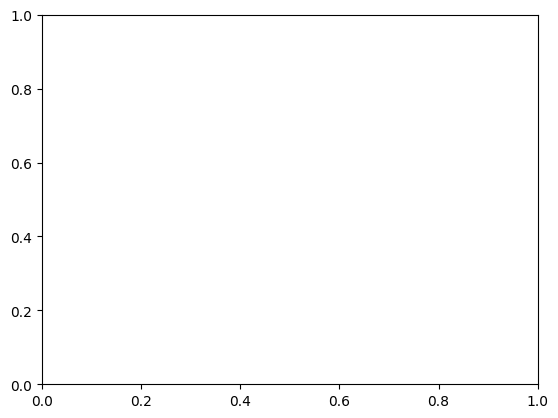

In [26]:
import seaborn as sns

fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)), labels=farmers)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()